In [1]:
import sys
sys.path.append('../')
sys.path.append('../src/')

import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import pandas as pd
import numpy as np

from src.utils import load_monk2, load_monk3, load_monk1
from src.network import Network
from src.activations import ReLU, Tanh, Sigmoid
from src.losses import MeanSquaredError
from src.metrics import BinaryAccuracy, MulticlassAccuracy, MeanEuclideanError
from src.regularizers import L2, L1
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from src.callbacks import EarlyStopping, Callback


In [2]:
#load monk 2
x_train, x_val, x_test, y_train, y_val, y_test = load_monk2()

In [3]:
model = Network(17)
model.add_layer(4, ReLU())
model.add_layer(1, Sigmoid(), initializer='xavier')

In [ ]:
train_mse = []
train_acc = []
test_mse = []
test_acc = []
for i in range(1,10):
    stats = model.train((x_train, y_train),(x_val, y_val),
        metric=BinaryAccuracy(), 
        loss=MeanSquaredError(), 
        epochs=1000, 
        eta=0.1, 
        nesterov=0.9, 
        callbacks=[EarlyStopping(patience=100)], 
        verbose=True)
    train_mse.append(stats['val_loss'][-1])
    train_acc.append(stats['val_acc'][-1])

    y_pred = model.multiple_outputs(x_test)
    binary_accuracy = BinaryAccuracy()
    acc = binary_accuracy(y_pred, y_test)
    test_acc.append(acc)

    mse = MeanSquaredError()
    mse = mse.loss(y_pred, y_test)
    test_mse.append(mse)

# average over 10 runs
print('Average Train MSE: ', np.mean(train_mse))
print('Average Train Accuracy: ', np.mean(train_acc))
print('Average Test MSE: ', np.mean(test_mse))
print('Average Test Accuracy: ', np.mean(test_acc))

In [4]:
stats = model.train((x_train, y_train),(x_val, y_val),
        metric=BinaryAccuracy(), 
        loss=MeanSquaredError(), 
        epochs=1000, 
        eta=0.1, 
        nesterov=0.9, 
        callbacks=[EarlyStopping(patience=100)], 
        verbose=True)

Training: 100%|█████████▉| 999/1000[, loss=4.36e-5, val_loss=2.67e-5, val_acc=1]  

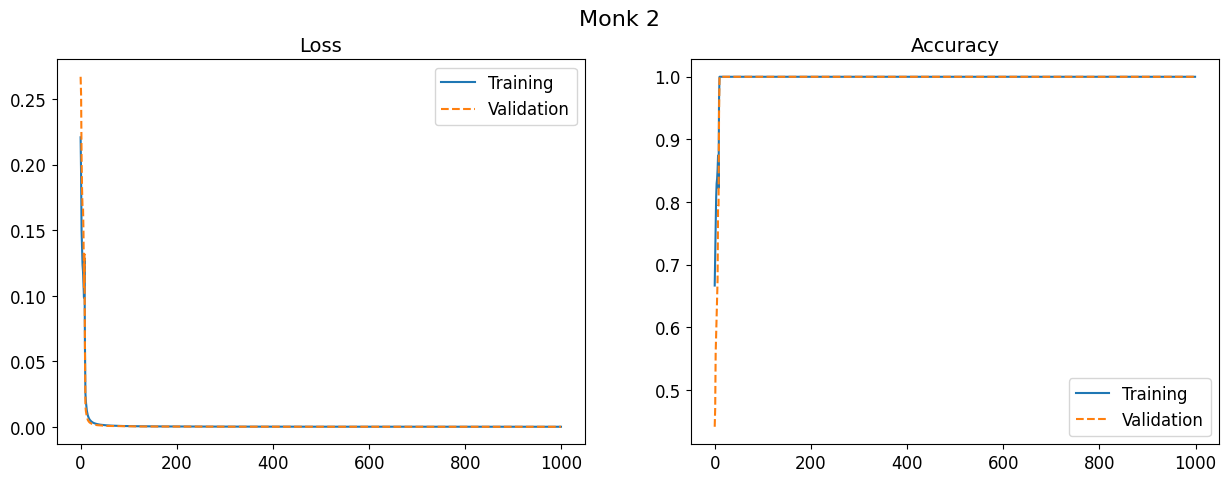

Training: 100%|██████████| 1000/1000[, loss=4.36e-5, val_loss=2.67e-5, val_acc=1]

In [5]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))
#add title to figure
fig.suptitle('Monk 2', fontsize=16)

sns.lineplot(stats['train_loss'], ax=axs[0], label='Training')
sns.lineplot(stats['val_loss'], ax=axs[0], label='Validation', linestyle='--')
sns.lineplot(stats['train_acc'], ax=axs[1], label='Training')
sns.lineplot(stats['val_acc'], ax=axs[1], label='Validation', linestyle='--')

#add title and legend
axs[0].set_title('Loss', fontsize=14)
axs[1].set_title('Accuracy', fontsize=14)
axs[0].legend(fontsize=12)
axs[1].legend(fontsize=12)
#increase font size
axs[0].tick_params(labelsize=12)
axs[1].tick_params(labelsize=12)


In [ ]:
#compute accuracy on test set
# compute accuracy
y_pred = model.multiple_outputs(x_test)
binary_accuracy = BinaryAccuracy()
acc = binary_accuracy(y_pred, y_test)
print(acc)
